# Ivan's E-Commerce Exploratory NoteBook

#####
Data Importing and Pre-processing
- Import dataset and describe characteristics such as dimensions, data types, file types, and import methods used
- Clean, wrangle, and handle missing data
- Transform data appropriately using techniques such as aggregation, normalization, and feature construction
- Reduce redundant data and perform need based discretization

Data Analysis and Visualization
- Identify categorical, ordinal, and numerical variables within data
- Provide measures of centrality and distribution with visualizations
- Diagnose for correlations between variables and determine independent and dependent variables
- Perform exploratory analysis in combination with visualization techniques to discover patterns and features of interest

Data Analytics
- Determine the need for a supervised or unsupervised learning method and identify dependent and independent variables
- Train, test, and provide accuracy and evaluation metrics for model results

Presentation
- In a 5 to 10 minutes video, briefly explain the project workflow from the code and results in your markdown notebook
State your findings from the data and provide the interpretation of results from your analysis at each stage in the project

#### Importing libraries

In [48]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing CSV Dataset from E-Commerce

In [49]:
#Set File Path & import csv
datasetFP = '../data/Dataset 3 (Online Shoppers Intention)/online_shoppers_intention.csv'
eCommerceDF = pd.read_csv(datasetFP) 

#### Getting number of rows and columns

In [50]:
eCommerceDF.shape

(12330, 18)

#### Displaying Data type

In [51]:
eCommerceDF.dtypes

Administrative               int64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems           float64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

#### Displaying count for all null values in each column

In [52]:
eCommerceDF.isnull().sum()

Administrative               0
Administrative_Duration      0
Informational              128
Informational_Duration       0
ProductRelated               0
ProductRelated_Duration      0
BounceRates                  0
ExitRates                    0
PageValues                 135
SpecialDay                   0
Month                        0
OperatingSystems           123
Browser                      0
Region                       0
TrafficType                  0
VisitorType                  0
Weekend                      0
Revenue                      0
dtype: int64

#### Grouped Informational Pages by duration

In [53]:
eCommerceDF.groupby(['Informational'])['Informational_Duration'].mean()

Informational
0.0        0.000000
1.0       72.384123
2.0      139.785144
3.0      191.345717
4.0      254.306293
5.0      396.399345
6.0      422.321253
7.0      390.512416
8.0      503.889031
9.0      705.293704
10.0     602.566667
11.0    1258.833333
12.0     651.145476
13.0    1949.166667
14.0     893.783334
16.0    1210.397619
24.0    2050.433333
Name: Informational_Duration, dtype: float64

#### Grouped by Informational to find that when one of the values is zero the following condition is satisfied Informational == Informational_Duration 

In [54]:
eCommerceDF.loc[eCommerceDF['Informational'].isnull()&eCommerceDF['Informational_Duration'].notnull()&eCommerceDF['Informational_Duration'].eq(0),'Informational'] = 0

#### Informational data is heavily right skewed opted for dropping null values

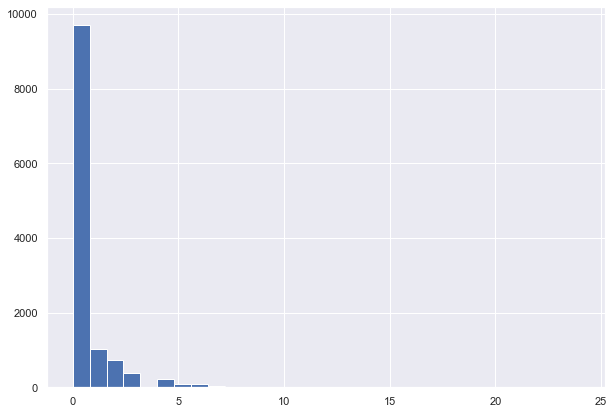

In [55]:
fig = plt.figure()
plt.hist(eCommerceDF['Informational'].dropna(),bins=30)
plt.show()

In [56]:
eCommerceDF.isnull().sum()

Administrative               0
Administrative_Duration      0
Informational               24
Informational_Duration       0
ProductRelated               0
ProductRelated_Duration      0
BounceRates                  0
ExitRates                    0
PageValues                 135
SpecialDay                   0
Month                        0
OperatingSystems           123
Browser                      0
Region                       0
TrafficType                  0
VisitorType                  0
Weekend                      0
Revenue                      0
dtype: int64

In [57]:
revenueGroupBy = round(eCommerceDF.groupby(['Revenue'])['PageValues'].mean(),2)
revenueGroupBy

Revenue
False     1.99
True     27.35
Name: PageValues, dtype: float64

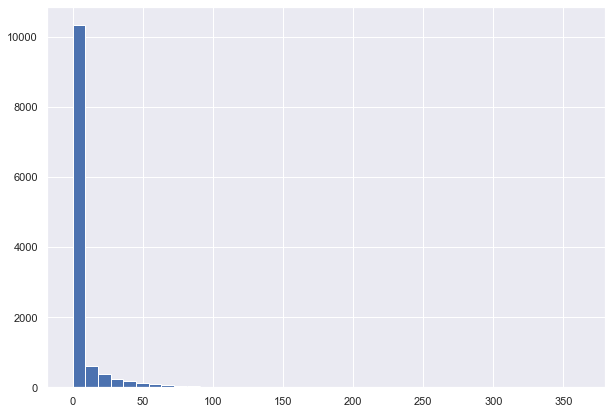

In [58]:
fig = plt.figure()
plt.hist(eCommerceDF['PageValues'].dropna(),bins=40)
plt.show()

<AxesSubplot:xlabel='Revenue', ylabel='PageValues'>

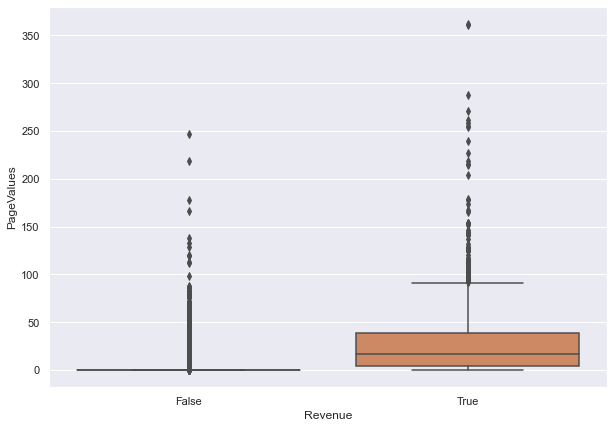

In [59]:
sns.set(rc={'figure.figsize':(10,7)})
sns.boxplot(x="Revenue", y="PageValues", data=eCommerceDF.dropna())

In [60]:
eCommerceDF['PageValues'].describe()

count    12195.000000
mean         5.911196
std         18.632116
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        361.763742
Name: PageValues, dtype: float64

In [61]:
eCommerceDF.loc[eCommerceDF['PageValues'].isnull()&eCommerceDF['Revenue'].notnull()&eCommerceDF['Revenue'].eq(False),'PageValues'] = revenueGroupBy[0]

In [62]:
eCommerceDF.isnull().sum()

Administrative               0
Administrative_Duration      0
Informational               24
Informational_Duration       0
ProductRelated               0
ProductRelated_Duration      0
BounceRates                  0
ExitRates                    0
PageValues                  21
SpecialDay                   0
Month                        0
OperatingSystems           123
Browser                      0
Region                       0
TrafficType                  0
VisitorType                  0
Weekend                      0
Revenue                      0
dtype: int64

In [63]:
eCommerceDF[eCommerceDF['OperatingSystems'].isna()].head(50)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
567,1,7.000000,0.0,0.00,17,2648.500000,0.012500,0.031250,0.000000,0.0,Mar,NaN,2,1,2,Returning_Visitor,False,False
835,7,163.666667,0.0,0.00,8,119.333333,0.015385,0.023077,0.000000,0.0,Mar,NaN,2,6,11,New_Visitor,True,False
840,3,60.000000,0.0,0.00,19,494.500000,0.000000,0.010000,0.000000,0.0,Mar,NaN,1,3,9,Returning_Visitor,True,False
909,4,162.000000,3.0,75.50,4,158.500000,0.000000,0.016667,0.000000,0.0,Mar,NaN,4,1,10,Returning_Visitor,False,False
966,14,272.500000,2.0,52.25,55,1127.288305,0.003125,0.014499,0.000000,0.0,Mar,NaN,2,7,1,Returning_Visitor,False,False
1072,1,45.000000,0.0,0.00,13,1610.916667,0.000000,0.007143,0.000000,0.0,Mar,NaN,1,1,3,New_Visitor,True,False
1119,0,0.000000,0.0,0.00,1,0.000000,0.200000,0.200000,0.000000,0.0,Mar,NaN,2,1,1,Returning_Visitor,False,False
1204,0,0.000000,0.0,0.00,30,365.400000,0.027586,0.035862,0.000000,0.0,Mar,NaN,2,6,1,Returning_Visitor,False,False
1416,7,77.500000,0.0,0.00,14,192.933333,0.000000,0.013333,0.000000,0.0,Mar,NaN,2,1,1,Returning_Visitor,False,False
1421,0,0.000000,0.0,0.00,12,448.500000,0.000000,0.033333,0.000000,0.0,Mar,NaN,2,1,2,Returning_Visitor,False,False


In [64]:
eCommerceDF.shape[0]

12330

#### Dropped ~1% 

In [65]:
eCommerceDF = eCommerceDF.dropna()

In [66]:
eCommerceDF.shape[0]

12164

In [67]:
eCommerceDF.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.602309,0.374725,0.252467,0.429637,0.372161,-0.223723,-0.316823,0.100803,-0.095324,-0.004734,-0.024853,-0.005313,-0.033841,0.026163,0.137313
Administrative_Duration,0.602309,1.000000,0.303237,0.237138,0.281883,0.349024,-0.144607,-0.206429,0.068940,-0.073613,-0.005950,-0.014749,-0.004047,-0.013777,0.016295,0.095587
Informational,0.374725,0.303237,1.000000,0.620980,0.371244,0.384876,-0.115313,-0.162532,0.049829,-0.047817,-0.008210,-0.037115,-0.029809,-0.032917,0.034036,0.093731
Informational_Duration,0.252467,0.237138,0.620980,1.000000,0.277210,0.345478,-0.073720,-0.104723,0.031271,-0.031215,-0.011077,-0.017803,-0.026606,-0.025186,0.024587,0.068876
ProductRelated,0.429637,0.281883,0.371244,0.277210,1.000000,0.858737,-0.205433,-0.293720,0.057965,-0.022975,0.005212,-0.012200,-0.037343,-0.042017,0.016525,0.158276
ProductRelated_Duration,0.372161,0.349024,0.384876,0.345478,0.858737,1.000000,-0.185447,-0.253138,0.053736,-0.035803,0.004360,-0.006624,-0.032566,-0.035875,0.007737,0.152177
BounceRates,-0.223723,-0.144607,-0.115313,-0.073720,-0.205433,-0.185447,1.000000,0.912903,-0.118888,0.073630,0.023058,-0.014934,-0.005998,0.078117,-0.046083,-0.150189
ExitRates,-0.316823,-0.206429,-0.162532,-0.104723,-0.293720,-0.253138,0.912903,1.000000,-0.174147,0.103209,0.014008,-0.003401,-0.008988,0.078007,-0.062375,-0.206684
PageValues,0.100803,0.068940,0.049829,0.031271,0.057965,0.053736,-0.118888,-0.174147,1.000000,-0.065368,0.019257,0.045457,0.011839,0.014183,0.011583,0.492258
SpecialDay,-0.095324,-0.073613,-0.047817,-0.031215,-0.022975,-0.035803,0.073630,0.103209,-0.065368,1.000000,0.012815,0.001422,-0.016792,0.050530,-0.017738,-0.084532


In [68]:
eCommerceDF.dtypes

Administrative               int64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems           float64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [69]:
eCommerceDF['Informational'] = eCommerceDF['Informational'].astype('int64')

In [72]:
eCommerceDF.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems           float64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [78]:
eCommerceDF.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1.0,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2.0,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4.0,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3.0,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3.0,3,1,4,Returning_Visitor,True,False


In [80]:
eCommerceDF['VisitorType'].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [83]:
eCommerceDF['TrafficType'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 18, 19,
       16, 17, 20])

In [88]:
narrowCustomerDF = eCommerceDF.drop(columns=['BounceRates','ExitRates','OperatingSystems','Region','Browser','TrafficType'])
narrowCustomerDF

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,PageValues,SpecialDay,Month,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.000000,0.0,Feb,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.0,Feb,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.000000,0.0,Feb,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.000000,0.0,Feb,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.000000,0.0,Feb,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,12.241717,0.0,Dec,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.0,Nov,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.000000,0.0,Nov,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.0,Nov,Returning_Visitor,False,False


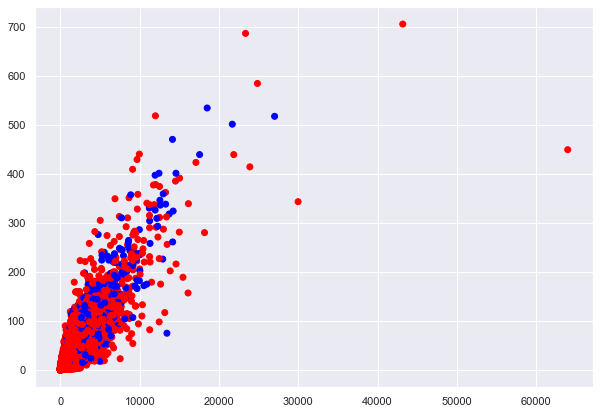

In [101]:
colors = {True : 'blue', False:'red'}
plt.scatter(narrowCustomerDF['ProductRelated_Duration'],narrowCustomerDF['ProductRelated'], c =  narrowCustomerDF['Revenue'].map(colors))

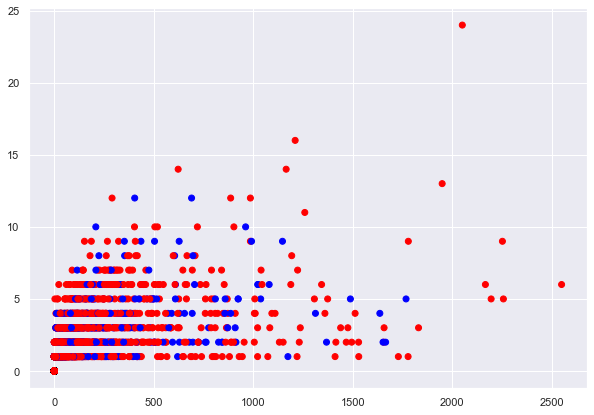

In [102]:
colors = {True : 'blue', False:'red'}
plt.scatter(narrowCustomerDF['Informational_Duration'],narrowCustomerDF['Informational'], c =  narrowCustomerDF['Revenue'].map(colors))

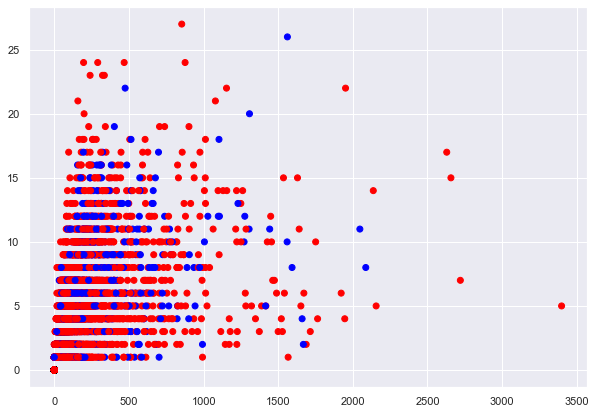

In [103]:
colors = {True : 'blue', False:'red'}
plt.scatter(narrowCustomerDF['Administrative_Duration'],narrowCustomerDF['Administrative'], c =  narrowCustomerDF['Revenue'].map(colors))

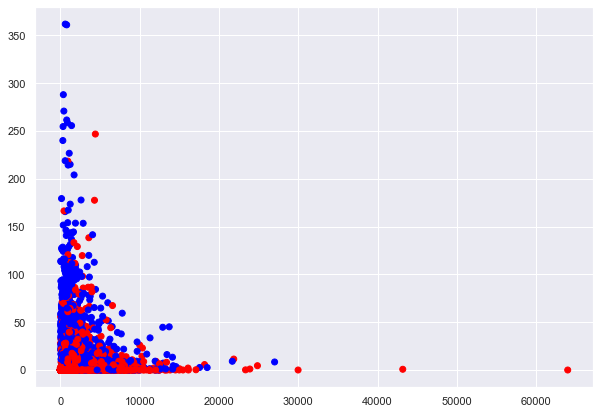

In [104]:
colors = {True : 'blue', False:'red'}
plt.scatter(narrowCustomerDF['ProductRelated_Duration'],narrowCustomerDF['PageValues'], c =  narrowCustomerDF['Revenue'].map(colors))

In [107]:
narrowCustomerDF['PageValues_Duration'] = round((narrowCustomerDF['ProductRelated_Duration']+ narrowCustomerDF['Administrative_Duration'] +narrowCustomerDF['Informational_Duration'])/3,2)
narrowCustomerDF

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,PageValues,SpecialDay,Month,VisitorType,Weekend,Revenue,PageValues_Duration
0,0,0.0,0,0.0,1,0.000000,0.000000,0.0,Feb,Returning_Visitor,False,False,0.00
1,0,0.0,0,0.0,2,64.000000,0.000000,0.0,Feb,Returning_Visitor,False,False,21.33
2,0,0.0,0,0.0,1,0.000000,0.000000,0.0,Feb,Returning_Visitor,False,False,0.00
3,0,0.0,0,0.0,2,2.666667,0.000000,0.0,Feb,Returning_Visitor,False,False,0.89
4,0,0.0,0,0.0,10,627.500000,0.000000,0.0,Feb,Returning_Visitor,True,False,209.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,12.241717,0.0,Dec,Returning_Visitor,True,False,642.93
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.0,Nov,Returning_Visitor,True,False,155.25
12327,0,0.0,0,0.0,6,184.250000,0.000000,0.0,Nov,Returning_Visitor,True,False,61.42
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.0,Nov,Returning_Visitor,False,False,140.33


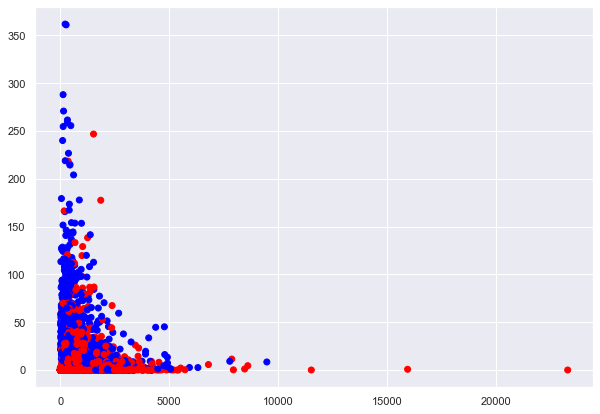

In [108]:
colors = {True : 'blue', False:'red'}
plt.scatter(narrowCustomerDF['PageValues_Duration'],narrowCustomerDF['PageValues'], c =  narrowCustomerDF['Revenue'].map(colors))